In [1]:
#Importando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import Input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [3]:
#Importando o Dataset

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
#Verificando as Colunas

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
#Verificando se existem valores nulos

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#HeatMap Para Demonstrar a Relação entre as variáveis

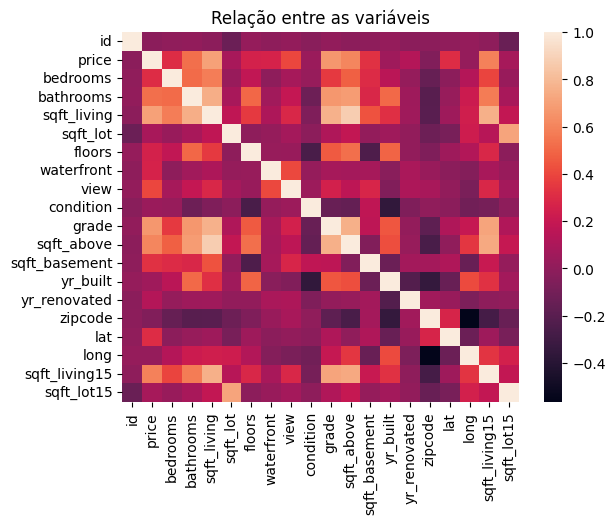

In [10]:
sns.heatmap(data=df.select_dtypes(include='number').corr())
plt.title('Relação entre as variáveis')
plt.show()

In [11]:
#Separando os Valores que serão utilizados na predição

In [12]:
X = df.iloc[:, 3:].values
x = X[:, np.r_[0:13,14,18:]]
y = df.iloc[:,2].values

In [13]:
#Separando entre Treino e Teste

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size= 0.2,random_state=0)

In [15]:
#Escalonando Valores

In [16]:
xscaler = MinMaxScaler(feature_range=(0,1))
xTrain = xscaler.fit_transform(xTrain)
xTest = xscaler.transform(xTest)

In [17]:
yscaler = MinMaxScaler(feature_range=(0,1))
yTrain = yscaler.fit_transform(yTrain.reshape(-1,1))
yTest = yscaler.transform(yTest.reshape(-1,1))

In [18]:
#Criando Modelo

In [19]:
model = Sequential()
model.add(Input(shape = (x.shape[1],)))
model.add(Dense(units = 16, activation = 'linear'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mse', metrics = ['mean_absolute_error'])

In [20]:
#Aplicando o Modelo

In [21]:
history = model.fit(xTrain, yTrain, batch_size = 32, epochs = 100, validation_data = (xTest, yTest))

Epoch 1/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 0.0118 - mean_absolute_error: 0.0610 - val_loss: 0.0013 - val_mean_absolute_error: 0.0259
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0010 - mean_absolute_error: 0.0220 - val_loss: 7.8671e-04 - val_mean_absolute_error: 0.0178
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 8.1356e-04 - mean_absolute_error: 0.0183 - val_loss: 8.4596e-04 - val_mean_absolute_error: 0.0191
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 7.9454e-04 - mean_absolute_error: 0.0180 - val_loss: 6.6276e-04 - val_mean_absolute_error: 0.0165
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 8.2948e-04 - mean_absolute_error: 0.0185 - val_loss: 6.3650e-04 - val_mean_absolute_error: 0.0157
Epoch 6/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 8.3007e-04 - mean_absolute_error: 0.0186 - val_loss: 6.3119e-04 - val_mean_absolute_error: 0.0157
Epoch 7/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 82

In [22]:
#Testando o Modelo

In [23]:
yTest = yscaler.inverse_transform(yTest)
prediction = yscaler.inverse_transform(model.predict(xTest))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


In [24]:
#Gráfico com valores reais e previstos

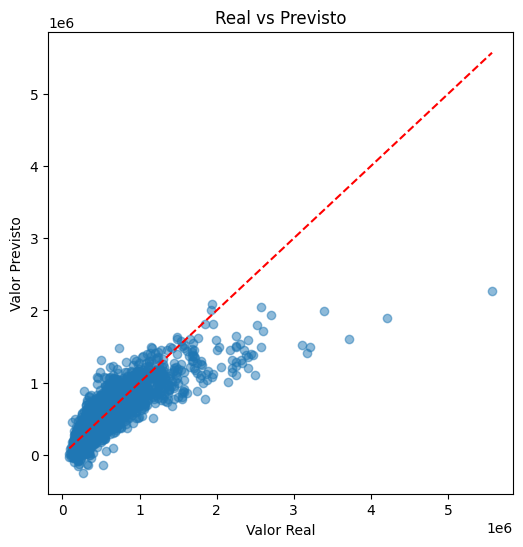

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(yTest, prediction, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Real vs Previsto')
plt.show()

In [26]:
#Gráfico com a Evolução da Loss por Epoch

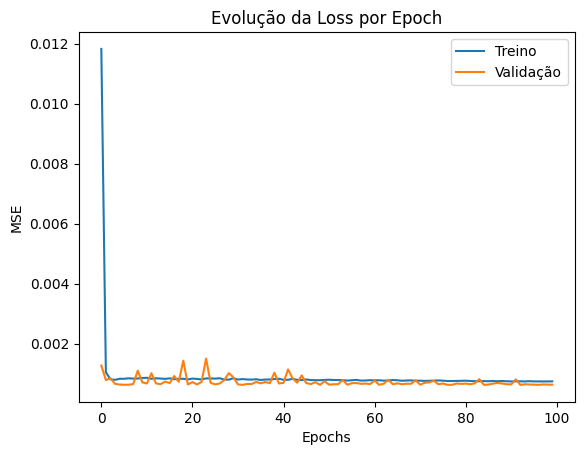

In [27]:
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Loss por Epoch')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [28]:
#Erro Médio Absoluto

In [29]:
error = abs(prediction - yTest)/yTest
print(np.mean(error))

0.24809881041823892
